# I. KMeans Clustering Implementation
The functions of the implementation below have the same concept of using Scikitlearn.
1. Define KMeans Object
2. Fit the model to all data 
3. Return Clusters' centroids 
4. Predict labels 

## Import Libraries

In [2]:
from __future__ import print_function 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(10)

## Create a Class Kmeans
1. Define KMeans Object (__init__)
2. Fit data to the model (fit(self, X))
 - Randomly choose K data points as initial centroids
 - Assign each data point to the closest centroids chosen in 2.1
 - Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.
3. Return Clusters' centroids (cluster_centers(self))
4. Predict labels (ID_labels(self))

In [3]:
class Kmeans:

    def __init__(self, K, max_iteration):
        self.K = K
        self.max_iteration = max_iteration
        
    def kmeans_init_centroids(self, X):
        # randomly pick K rows of X as K-initial centers
        return X[np.random.choice(X.shape[0], self.K, replace=False)]
    
    def find_closest(self, X, centroids):
        # calculate pairwise distances between input and centroids
        D = cdist(X, centroids)
        # return index of the closest centroid
        return np.argmin(D, axis = 1)
    
    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.K, X.shape[1]))
        # compute the centroids for the clusters by taking the average of the all data points of each cluster.
        for i in range(self.K):    
            centroids[i, :] = np.mean(X[labels == i, :], axis=0)
        return centroids
    
    def fit(self, X):
        self.centroids = self.kmeans_init_centroids(X)
        iteration = 0
        while True:
            iteration += 1
            old_centroids = self.centroids
            self.labels = self.find_closest(X, old_centroids)
            self.centroids = self.compute_centroids(X, self.labels)
            if iteration > self.max_iteration or np.all(old_centroids == self.centroids):
                break
                
    def cluster_centers(self):
        return (self.centroids) 
    
    # Return a set of cluster ID that each point belongs to
    def ID_labels(self):
        df = pd.DataFrame({'X_axis':X[:,0],'Y_axis':X[:,1]})
        df["ID_label"] = self.labels
        return df
    


# II. Test Code
Create new sets of two dimensional points and test them

In [9]:
mean = [[1, 2], [10, 7], [4, 5]]
cov = [[1, 0], [0, 1]]
N = 1000
X0 = np.random.multivariate_normal(mean[0], cov, N)
X1 = np.random.multivariate_normal(mean[1], cov, N)
X2 = np.random.multivariate_normal(mean[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
np.random.shuffle(X)

## Fit the model to all data

In [15]:
obj = Kmeans(3, 20)
obj.fit(X)

## The coordinates of centroids

In [16]:
obj.cluster_centers()

array([[4.03261187, 5.02762352],
       [0.98331235, 1.96662206],
       [9.93747295, 7.06143947]])

## Cluster ID of data
Print the 10 first rows

In [17]:
obj.ID_labels()[:10]

,X_axis,Y_axis,ID_label
0,9.527540,6.886454,2
1,0.143362,2.133963,1
2,3.510693,5.552151,0
3,10.324765,7.629303,2
4,2.210090,0.493747,1
5,0.267875,1.567414,1
6,3.512658,4.404742,0
7,1.109198,1.332111,1
8,2.830336,4.224922,0
9,9.388389,7.125984,2


# III. Visualization

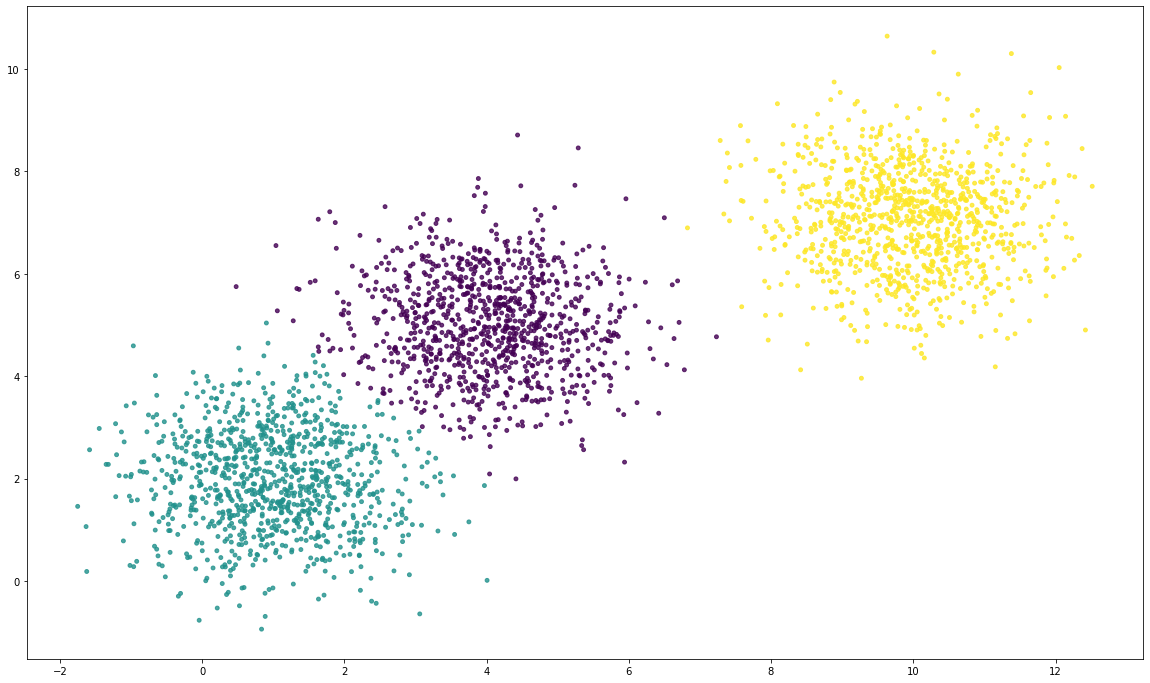

In [19]:
fig = plt.figure(figsize=(20,12))
df = obj.ID_labels()
plt.scatter(df.X_axis, df.Y_axis, c=df.ID_label, alpha = 0.8, s=15)